In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Part (a)

In [2]:
def generate_random_signal(N, num_nonzero):
    signal = np.zeros(N)
    nonzero_indices = np.random.choice(N, num_nonzero, replace=False)
    for idx in nonzero_indices:
        signal[idx] = np.random.choice([-1, 1])  # randomly choose +1 or -1
    return signal

def generate_measurement_matrix(k, N):
    return np.random.randn(k, N)

def generate_noise(k, sigma_squared):
    return np.random.normal(loc=0, scale=np.sqrt(sigma_squared), size=k)

def generate_observations(A, x, noise_variance):
    return np.dot(A, x) + generate_noise(len(A), noise_variance)


Signal: [0. 0. 0. ... 0. 0. 0.]


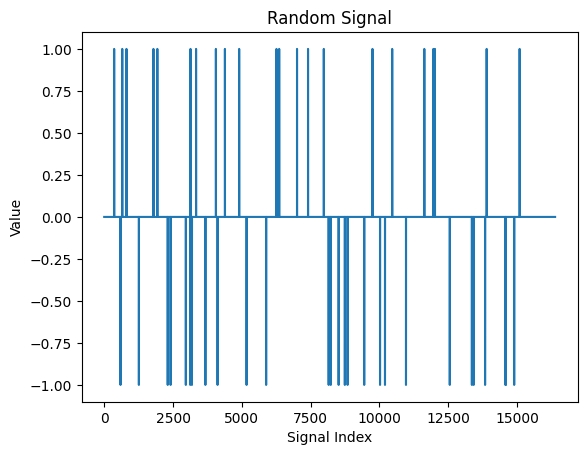

Observations: [ 9.74224468 -1.4096467   0.574642   ... -0.54507519  6.12715099
  5.09368193]


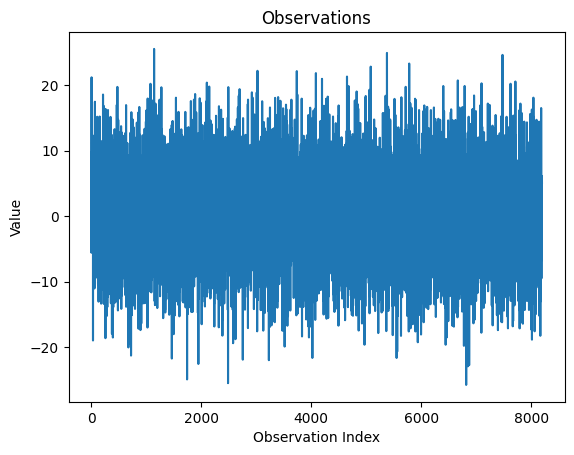

In [4]:
np.random.seed(1234)
N = 2**14
num_nonzero = 50
k = 2**13
noise_variance = 10**(-4)

# Generate random signal
x = generate_random_signal(N, num_nonzero)

# Generate measurement matrix
A = generate_measurement_matrix(k, N)

# Generate observations
y = generate_observations(A, x, noise_variance)

print("Signal:", x)
plt.plot(x)
plt.title("Random Signal")
plt.xlabel("Signal Index")
plt.ylabel("Value")
 #plt.savefig("C:/Users/nicks/Desktop/Flinders Honours year/2024 Sem 2 coursework/random_signal_project_part_1.jpg",dpi=300)
plt.show()
print("Observations:", y)
plt.plot(y)
plt.title("Observations")
plt.xlabel("Observation Index")
plt.ylabel("Value")
plt.savefig("C:/Users/nicks/Desktop/Flinders Honours year/2024 Sem 2 coursework/random_signal_observation_project_part_1.jpg",dpi=300)
plt.show()


# Part (b) and (c)

In [15]:


def euclidean_projection_L1(x, t):
    if np.linalg.norm(x, ord=1) <= t:
        return x
    else:
        u = np.abs(x)
        u_sorted = np.sort(u)[::-1]
        cumsum = np.cumsum(u_sorted)
        rho = np.max(np.where(u_sorted - (1 / (np.arange(1, len(u_sorted) + 1))) * (cumsum - t) > 0))
        theta = (1 / (rho + 1)) * (cumsum[rho] - t)
        return np.sign(x) * np.maximum(u - theta, 0)

def nesterov_fast_gradient_descenta(y, A, t, gamma=0.5, max_iter=1000, tol=1e-15):
    n, m = A.shape
    x = np.zeros(m)  # Initial guess for x
    x_prev = np.zeros(m)
    yk = x.copy()
    lambda_k = 1.0
    
    for i in range(max_iter):
        gradient = A.T @ (A @ yk - y)
        x_temp = euclidean_projection_L1(yk - lambda_k * gradient, t)
        
        # Line search
        while True:
            g_x_temp = 0.5 * np.linalg.norm(y - A @ x_temp)**2
            g_yk = 0.5 * np.linalg.norm(y - A @ yk)**2
            if g_x_temp <= g_yk + np.dot(gradient, x_temp - yk) + (1 / (2 * lambda_k)) * np.linalg.norm(x_temp - yk)**2:
                break
            lambda_k *= gamma
            x_temp = euclidean_projection_L1(yk - lambda_k * gradient, t)
        
        x_prev = x.copy()
        x = x_temp
        yk = x + ((i - 1) / (i + 2)) * (x - x_prev)
           
        if np.linalg.norm(x - x_prev) < tol:
            print("Converged in", i, "iterations")
            break
    
    return x

discovered_x_tfifty = nesterov_fast_gradient_descenta(y, A, 50, max_iter=1000)  
discovered_x_tthirty = nesterov_fast_gradient_descenta(y, A, 30, max_iter=1000) 
discovered_x_tsixty = nesterov_fast_gradient_descenta(y, A, 60, max_iter=1000) 



# Part (d) and (e) plots

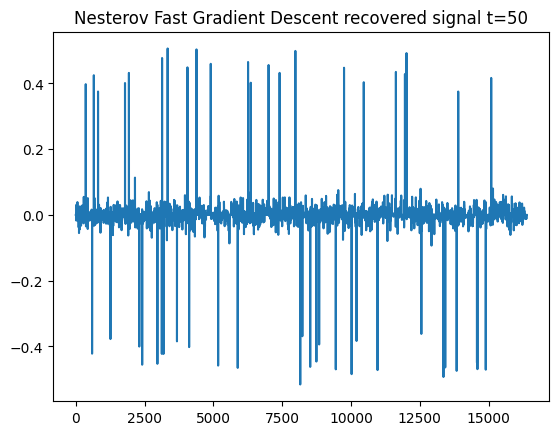

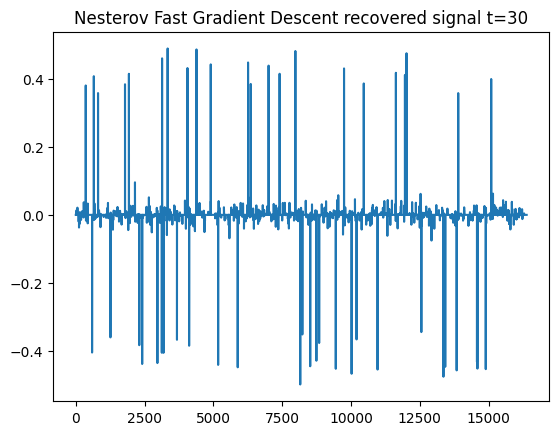

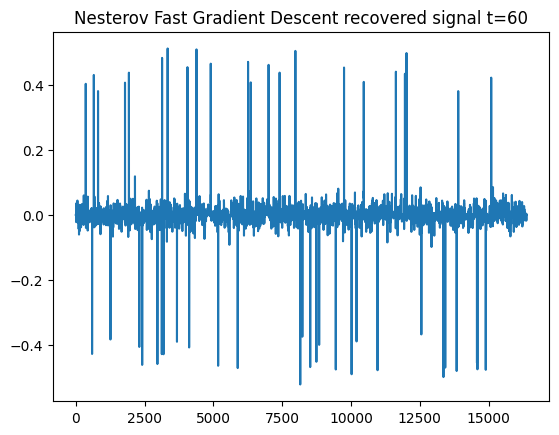

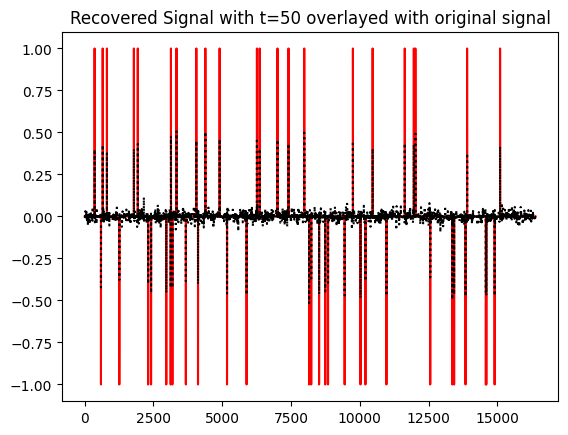

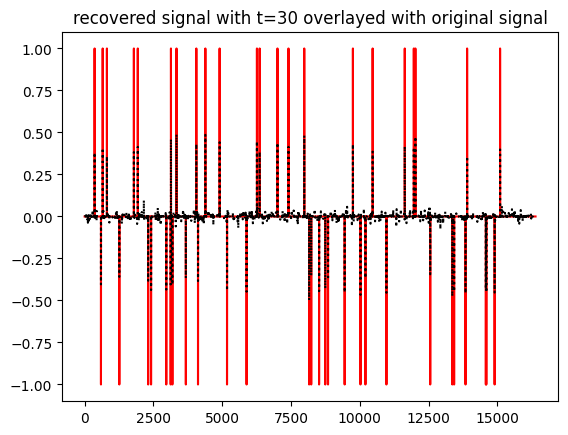

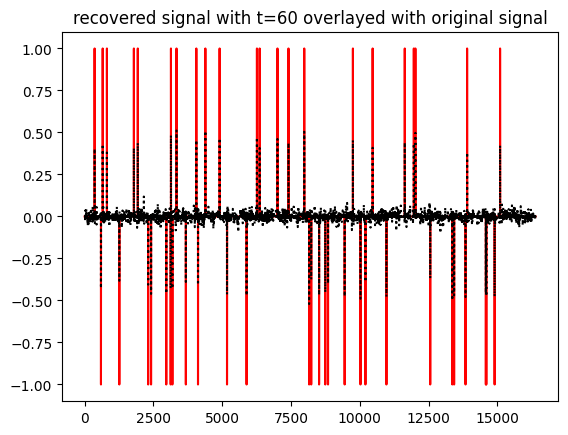

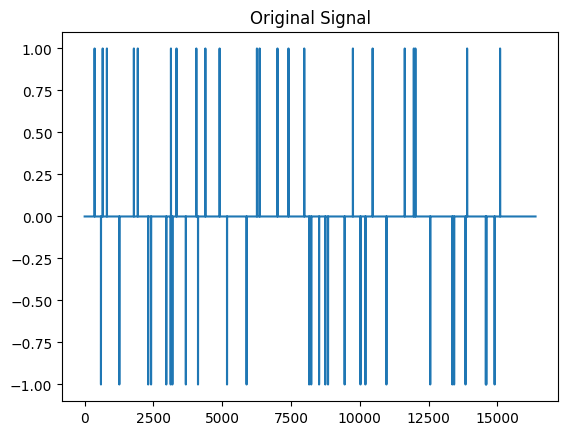

In [16]:
plt.plot(discovered_x_tfifty)
plt.title("Nesterov Fast Gradient Descent recovered signal t=50")
#plt.savefig("C:/Users/nicks/Desktop/Flinders Honours year/2024 Sem 2 coursework/recovered_t=50.jpg",dpi=300)
plt.show()
plt.plot(discovered_x_tthirty)
plt.title("Nesterov Fast Gradient Descent recovered signal t=30")
#plt.savefig("C:/Users/nicks/Desktop/Flinders Honours year/2024 Sem 2 coursework/recovered_t=30.jpg",dpi=300)
plt.show()
plt.plot(discovered_x_tsixty)
plt.title("Nesterov Fast Gradient Descent recovered signal t=60")
#plt.savefig("C:/Users/nicks/Desktop/Flinders Honours year/2024 Sem 2 coursework/recovered_t=60.jpg",dpi=300)
plt.show()

plt.plot(x, color='red')
plt.plot(discovered_x_tfifty,color='black',linestyle='dotted')
plt.title("Recovered Signal with t=50 overlayed with original signal") 
#plt.savefig("C:/Users/nicks/Desktop/Flinders Honours year/2024 Sem 2 coursework/originalandrecovered_t=50.jpg",dpi=300)
plt.show()

plt.plot(x, color='red')
plt.plot(discovered_x_tthirty,color='black',linestyle='dotted')
plt.title("recovered signal with t=30 overlayed with original signal")
#plt.savefig("C:/Users/nicks/Desktop/Flinders Honours year/2024 Sem 2 coursework/originalandrecovered_t=30.jpg",dpi=300)
plt.show()

plt.plot(x, color='red')
plt.plot(discovered_x_tsixty,color='black',linestyle='dotted')
plt.title("recovered signal with t=60 overlayed with original signal")
#plt.savefig("C:/Users/nicks/Desktop/Flinders Honours year/2024 Sem 2 coursework/originalandrecovered_t=60.jpg",dpi=300)
plt.show()

plt.plot(x)
plt.title("Original Signal")
plt.show()


# Example usage:
# Define your y, A, and t
# y = ...
# A = ...
# t = ...

# Call the function
# result = nesterov_fast_gradient_descent(y, A, t)
